In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import csv

In [42]:
# %%bash
# tail -n 10000 "coinbaseUSD.csv" > "coinbaseUSD-last_10000_trades.csv"
# wc -l "coinbaseUSD.csv"
# wc -l "coinbaseUSD-last_10000_trades.csv"

 50478627 coinbaseUSD.csv
   10000 coinbaseUSD-last_10000_trades.csv


In [3]:
d = {'unix_time':[],'last_price':[],'trade_volume':[]}

with open('coinbaseUSD-last_10000_trades.csv','r') as file:
    rows = csv.reader(file)
    for row in rows:
        d['unix_time'].append(row[0])
        d['last_price'].append(row[1])
        d['trade_volume'].append(row[2])

In [4]:
d

{'unix_time': ['1537327132',
  '1537327132',
  '1537327132',
  '1537327133',
  '1537327134',
  '1537327136',
  '1537327137',
  '1537327139',
  '1537327140',
  '1537327144',
  '1537327148',
  '1537327150',
  '1537327158',
  '1537327160',
  '1537327161',
  '1537327161',
  '1537327162',
  '1537327162',
  '1537327163',
  '1537327163',
  '1537327163',
  '1537327164',
  '1537327173',
  '1537327184',
  '1537327186',
  '1537327187',
  '1537327188',
  '1537327193',
  '1537327193',
  '1537327194',
  '1537327202',
  '1537327203',
  '1537327206',
  '1537327213',
  '1537327218',
  '1537327219',
  '1537327220',
  '1537327221',
  '1537327224',
  '1537327229',
  '1537327234',
  '1537327238',
  '1537327242',
  '1537327244',
  '1537327246',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327249',
  '1537327250',
  '1537327250',
  '15373272

In [44]:
df = pd.DataFrame(d)

In [50]:
df.head()

,unix_time,last_price,trade_volume
0,1537327132,6343.130000000000,0.033826180000
1,1537327132,6343.130000000000,0.026457910000
2,1537327132,6343.130000000000,0.025373790000
3,1537327133,6343.140000000000,0.051287440000
4,1537327134,6343.140000000000,0.073311460000


In [46]:
# vwap = (sum(price*volume))/total volume
# 

In [61]:
df1 = pd.read_csv('coinbaseUSD-last_10000_trades.csv', header = None)

In [62]:
df1.head()

,0,1,2
0,1537327132,6343.13,0.033826
1,1537327132,6343.13,0.026458
2,1537327132,6343.13,0.025374
3,1537327133,6343.14,0.051287
4,1537327134,6343.14,0.073311


In [86]:
df1.columns=['unix_time','last_price','trade_volume']

In [88]:
df1.head()

,unix_time,last_price,trade_volume
0,1537327132,6343.13,0.033826
1,1537327132,6343.13,0.026458
2,1537327132,6343.13,0.025374
3,1537327133,6343.14,0.051287
4,1537327134,6343.14,0.073311


In [94]:
df2 = df1[['last_price','trade_volume']]

In [95]:
df2.head()

,last_price,trade_volume
0,6343.13,0.033826
1,6343.13,0.026458
2,6343.13,0.025374
3,6343.14,0.051287
4,6343.14,0.073311


In [98]:
df3 = df2['last_price']*df2['trade_volume']

In [109]:
df3 = pd.DataFrame(df3)

In [110]:
df3.columns=['price_volume']

In [111]:
df3.head()

,price_volume
0,214.563857
1,167.825963
2,160.949249
3,325.323412
4,465.024854


In [112]:
df4 = pd.concat([df2,df3],axis=1)

In [113]:
df4.head()

,last_price,trade_volume,price_volume
0,6343.13,0.033826,214.563857
1,6343.13,0.026458,167.825963
2,6343.13,0.025374,160.949249
3,6343.14,0.051287,325.323412
4,6343.14,0.073311,465.024854


In [117]:
total_volume = df4['trade_volume'].sum()

In [123]:
vwap = df4['price_volume']/total_volume

In [129]:
df5 = pd.DataFrame(vwap)

In [131]:
df5.columns = ['VWAP']

In [133]:
df6 = pd.concat([df4,df5],axis=1)

In [136]:
df6.head()

,last_price,trade_volume,price_volume,VWAP
0,6343.13,0.033826,214.563857,0.193622
1,6343.13,0.026458,167.825963,0.151446
2,6343.13,0.025374,160.949249,0.145241
3,6343.14,0.051287,325.323412,0.293572
4,6343.14,0.073311,465.024854,0.419638


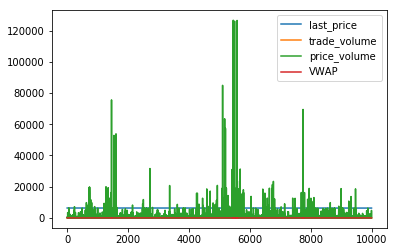

In [138]:
df6.plot()

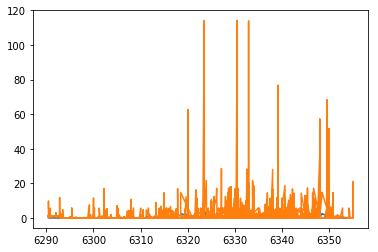

In [141]:
plt.plot(df6['last_price'],df6[['trade_volume', 'VWAP']])